# Breast cancer Ultrasound image -EDA and Data Preparation

In [1]:
import pandas as pd
import numpy as np
import glob
import re
import matplotlib
import matplotlib.pyplot as plt
import cv2
import shutil
import os
%matplotlib inline
from tensorflow.keras.preprocessing import image 
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

# Load data and visualize

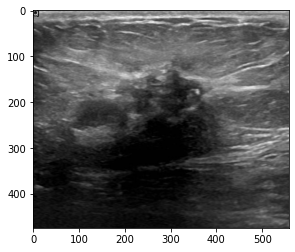

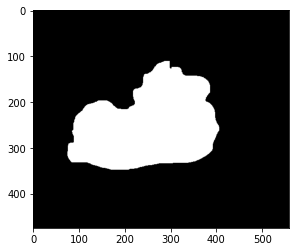

In [2]:
img = image.load_img('data/malignant/malignant (20).png')
#img=image.img_to_array(img)
plt.imshow(img,cmap='gray')
#img1 = np.expand_dims(img1,axis=0)
plt.show()
mask = image.load_img('data/malignant/malignant (20)_mask.png')
#mask=image.img_to_array(mask)
plt.imshow(mask)

# Plot representative images

<Figure size 2000x400 with 0 Axes>

(<matplotlib.axes._subplots.AxesSubplot at 0x10c3c9190>,
 <matplotlib.image.AxesImage at 0x6513d3f50>)

Text(0.5, 1.0, 'Original Image')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x6513d3fd0>,
 <matplotlib.image.AxesImage at 0x651486ad0>)

Text(0.5, 1.0, 'MASK')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x651486f90>,
 <matplotlib.image.AxesImage at 0x6514e6e90>)

Text(0.5, 1.0, 'ROI')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x651493750>,
 <matplotlib.image.AxesImage at 0x65154d890>)

Text(0.5, 1.0, 'ROI_clean')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x123ef8a50>,
 (array([  268.,  1966.,  8715., 20804., 21555., 10356.,  5845.,  4484.,
          3792.,  2844.,  2912.,  2717.,  2300.,  2951.,  2655.,  2480.,
          1788.,  1641.,  1302.,  1199.,  1338.,  1142.,  1256.,  1430.,
          1302.,  1176.,  1342.,  1701.,  1907.,  2355.,  3603.,  2991.,
          2694.,  3086.,  2582.,  2158.,  1881.,  1500.,  1644.,  1361.,
          1418.,  1006.,   844.,   781.,   933.,   729.,   634.,   554.,
           509.,  2456.]),
  array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
          45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
          91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
         137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
         183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
         229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
  <a list of 50 Patch objects>))

Text(0.5, 1.0, 'Histogram')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

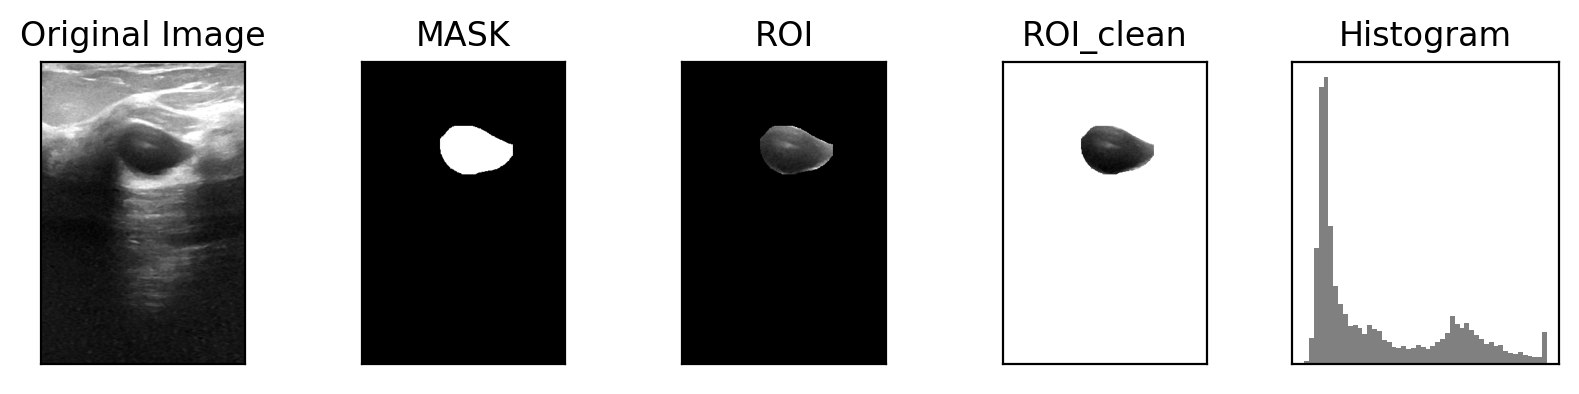

In [3]:

#benign

# Read image
img = cv2.imread('data/benign/benign (20).png', cv2.IMREAD_GRAYSCALE)

# Binary threshold image
mask = cv2.imread('data/benign/benign (20)_mask.png',cv2.IMREAD_GRAYSCALE)

#with black_background
merge1 = cv2.bitwise_and(img,mask)

ret,mask2 = cv2.threshold(mask,145,255,cv2.THRESH_BINARY_INV)

# combine mask
merge2 = cv2.bitwise_or(mask2,img)

#plot images

titles = ['Original Image','MASK','ROI','ROI_clean']
images = [img, mask,merge1, merge2]
plt.figure(figsize=(10,2),dpi=200)
for i in range(4):
    plt.subplot(1,5,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.subplot(1,5,5),plt.hist(img.ravel(),50,color='gray')
plt.title('Histogram')
plt.xticks([]),plt.yticks([])
plt.savefig('Benign_example.png')
plt.show()

<Figure size 2000x400 with 0 Axes>

(<matplotlib.axes._subplots.AxesSubplot at 0x6513de190>,
 <matplotlib.image.AxesImage at 0x651193f50>)

Text(0.5, 1.0, 'Original Image')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x10b82f190>,
 <matplotlib.image.AxesImage at 0x650ef9790>)

Text(0.5, 1.0, 'MASK')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x650ef9b90>,
 <matplotlib.image.AxesImage at 0x650fc2090>)

Text(0.5, 1.0, 'ROI')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x650ef9bd0>,
 <matplotlib.image.AxesImage at 0x650ff7990>)

Text(0.5, 1.0, 'ROI_clean')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x10b7dee10>,
 (array([2.0192e+04, 1.0215e+04, 1.2373e+04, 1.1898e+04, 9.7010e+03,
         6.8700e+03, 6.3590e+03, 7.8040e+03, 8.8970e+03, 7.9070e+03,
         8.0790e+03, 8.0250e+03, 7.1140e+03, 8.5760e+03, 9.0390e+03,
         1.0263e+04, 8.9190e+03, 8.9920e+03, 8.8430e+03, 9.3680e+03,
         1.0479e+04, 7.8460e+03, 7.7670e+03, 9.1390e+03, 6.8180e+03,
         5.2480e+03, 4.3830e+03, 3.8560e+03, 3.0690e+03, 2.7020e+03,
         2.8780e+03, 1.9480e+03, 1.6450e+03, 1.7740e+03, 1.4090e+03,
         9.9800e+02, 7.7100e+02, 5.4600e+02, 5.5200e+02, 4.8100e+02,
         4.1100e+02, 2.0100e+02, 1.9000e+02, 1.5700e+02, 1.8100e+02,
         7.3000e+01, 5.0000e+01, 1.9000e+01, 1.6000e+01, 9.0000e+00]),
  array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
          45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
          91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
         137.7, 142.8, 147.9, 153. 

Text(0.5, 1.0, 'Histogram')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

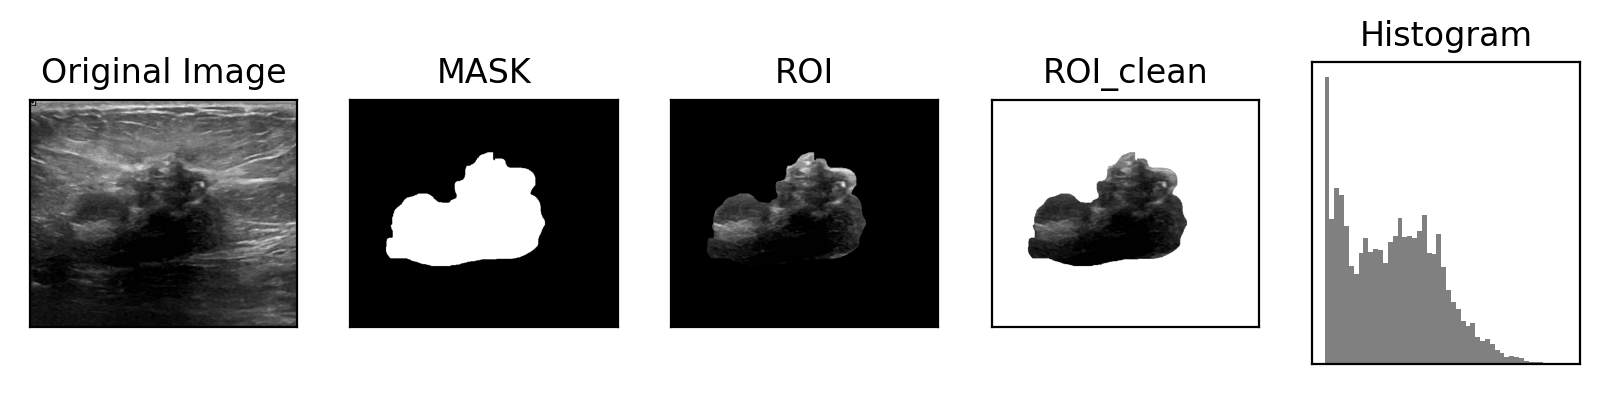

In [4]:
#for malignant

# Read image
img = cv2.imread('data/malignant/malignant (20).png', cv2.IMREAD_GRAYSCALE)

# Binary threshold image
mask = cv2.imread('data/malignant/malignant (20)_mask.png',cv2.IMREAD_GRAYSCALE)

#with black_background
merge1 = cv2.bitwise_and(img,mask)

ret,mask2 = cv2.threshold(mask,145,255,cv2.THRESH_BINARY_INV)

# combine mask
merge2 = cv2.bitwise_or(mask2,img)

#plot images

titles = ['Original Image','MASK','ROI','ROI_clean']
images = [img, mask,merge1, merge2]
plt.figure(figsize=(10,2),dpi=200)
for i in range(4):
    plt.subplot(1,5,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.subplot(1,5,5),plt.hist(img.ravel(),50,color='gray')
plt.title('Histogram')
plt.xticks([]),plt.yticks([])
plt.savefig('Malignant_example.png')
plt.show()



<Figure size 2000x400 with 0 Axes>

(<matplotlib.axes._subplots.AxesSubplot at 0x10b812390>,
 <matplotlib.image.AxesImage at 0x123ef8c50>)

Text(0.5, 1.0, 'Original Image')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x123ef8dd0>,
 <matplotlib.image.AxesImage at 0x650d59f50>)

Text(0.5, 1.0, 'MASK')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x123eb3610>,
 <matplotlib.image.AxesImage at 0x650d171d0>)

Text(0.5, 1.0, 'ROI')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x650d59550>,
 <matplotlib.image.AxesImage at 0x650d3b950>)

Text(0.5, 1.0, 'ROI_clean')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x10b7f9190>,
 (array([6.0000e+01, 3.6300e+02, 1.2480e+03, 3.8300e+03, 5.4560e+03,
         1.4604e+04, 1.9808e+04, 2.6779e+04, 3.6911e+04, 2.9066e+04,
         3.4243e+04, 3.7671e+04, 2.7326e+04, 3.7279e+04, 2.4825e+04,
         3.4985e+04, 3.1837e+04, 2.2112e+04, 2.4928e+04, 1.4444e+04,
         1.9095e+04, 1.8119e+04, 1.2375e+04, 1.5043e+04, 1.0737e+04,
         1.0800e+04, 1.1669e+04, 9.7960e+03, 9.6790e+03, 6.4920e+03,
         6.7350e+03, 5.3650e+03, 3.5680e+03, 3.4870e+03, 2.4590e+03,
         2.6650e+03, 2.0310e+03, 1.2990e+03, 1.4250e+03, 1.1190e+03,
         1.1700e+03, 5.1700e+02, 1.3900e+02, 1.0800e+02, 8.0000e+01,
         5.8000e+01, 1.8200e+02, 1.9200e+02, 4.2800e+02, 3.0000e+01]),
  array([ 15. ,  19.6,  24.2,  28.8,  33.4,  38. ,  42.6,  47.2,  51.8,
          56.4,  61. ,  65.6,  70.2,  74.8,  79.4,  84. ,  88.6,  93.2,
          97.8, 102.4, 107. , 111.6, 116.2, 120.8, 125.4, 130. , 134.6,
         139.2, 143.8, 148.4, 153. 

Text(0.5, 1.0, 'Histogram')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

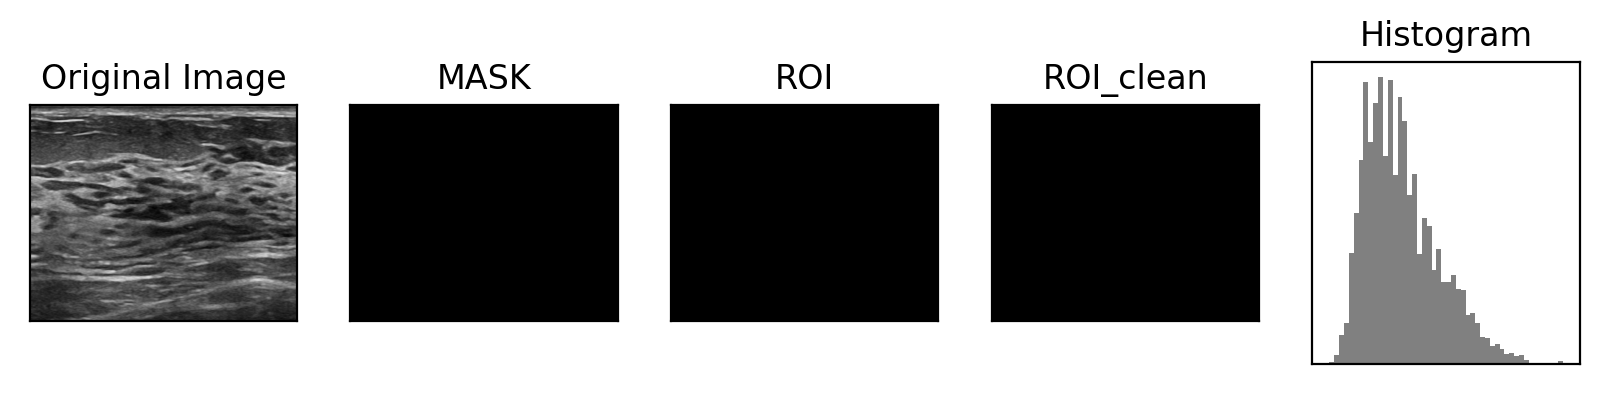

In [5]:
#for malignant
#benign

# Read image
img = cv2.imread('data/normal/normal (20).png', cv2.IMREAD_GRAYSCALE)

# Binary threshold image
mask = cv2.imread('data/normal/normal (20)_mask.png',cv2.IMREAD_GRAYSCALE)

#with black_background
merge1 = cv2.bitwise_and(img,mask)

ret,mask2 = cv2.threshold(mask,120,255,cv2.THRESH_BINARY_INV)

# combine mask
merge2 = cv2.bitwise_or(mask2,img)


#plot images

titles = ['Original Image','MASK','ROI','ROI_clean']
images = [img, mask,merge1, merge2]
plt.figure(figsize=(10,2),dpi=200)
for i in range(4):
    plt.subplot(1,5,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.subplot(1,5,5),plt.hist(img.ravel(),50,color='gray')
plt.title('Histogram')
plt.xticks([]),plt.yticks([])
plt.savefig('Normal_example.png')
plt.show()



In [6]:
#save image as png in directories
#also divide files as per category as train and test


test train split at 70:30 for each category we know that 

Lables from data are Normal Benign and Malignant

In [7]:
#get count of files in each category
nc = len(os.listdir('data/normal/'))//2

bc = len(os.listdir('data/benign/'))//2

mc= len(os.listdir('data/malignant/'))//2


In [8]:
#create objects with counter to write file
paths={'B':'benign/','M':'malignant/','N':'normal/'}
train_size={'B':round(bc*.7),'M':round(mc*.7),'N':round(nc*.7)}

<Figure size 400x400 with 0 Axes>

<BarContainer object of 3 artists>

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

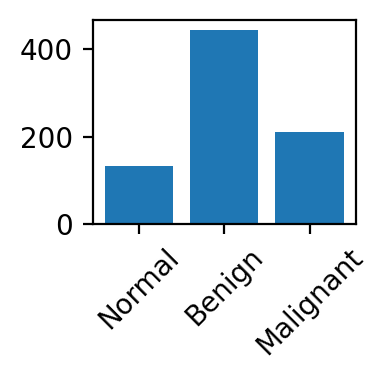

In [9]:
#count of files in each category
plt.figure(figsize=(2,2),dpi=200)
plt.bar(x=['Normal','Benign','Malignant'],height=[nc,bc,mc])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('image_category_count.png')
plt.show()

Text(0.5, 0, 'Classes')

Text(0, 0.5, 'Counts')

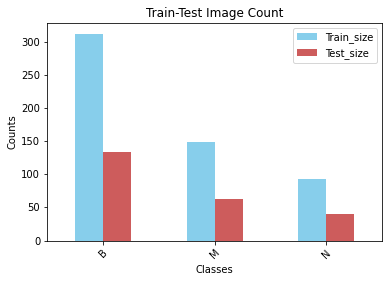

In [14]:
#test and train size
df = pd.DataFrame(train_size,index=['Train_size']).T
df['Test_size']=[bc-round(bc*.7),mc-round(mc*.7),nc-round(nc*.7)]
ax = df.plot.bar(color=["SkyBlue","IndianRed"],rot=45, title="Train-Test Image Count")
ax.set_xlabel("Classes")
ax.set_ylabel("Counts")
plt.show()


In [11]:
#Define function to read image and write to directory and 

def read_image_roi(fname,m_file):
    # Read image
    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    
    # Binary threshold image
    mask = cv2.imread(m_file,cv2.IMREAD_GRAYSCALE)

    #with black_background
    roi = cv2.bitwise_and(img,mask)
    ret,mask2 = cv2.threshold(mask,145,255,cv2.THRESH_BINARY_INV)

    # combine mask
    roi_clean = cv2.bitwise_or(mask2,img)
    return roi_clean

def write_to_dir(roi_c):
    
    if c<=train_size[key]:
        shutil.copy(fname, tr_path)
        shutil.copy(m_file, tr_path_m)
        cv2.imwrite( tr_path_r+re.split('[/.]', fname)[2]+'_roi.png',roi_c)
        
    
    else:
        shutil.copy(fname, test_path)
        shutil.copy(m_file, test_path_m)
        cv2.imwrite(test_path_r+re.split('[/.]', fname)[2]+'_roi.png',roi_c)
    

In [12]:
#create directory
for key in paths.keys():
    
    tr_path='US_DL/Train/'+paths[key]
    test_path='US_DL/Test/'+paths[key]

    tr_path_m='US_DL_mask/Train/'+paths[key]
    test_path_m='US_DL_mask/Test/'+paths[key]

    tr_path_r='US_DL_roi/Train/'+paths[key]
    test_path_r='US_DL_roi/Test/'+paths[key]


    os.makedirs(tr_path,exist_ok=True)
    os.makedirs(test_path,exist_ok=True)
    os.makedirs(tr_path_m,exist_ok=True)
    os.makedirs(test_path_m,exist_ok=True)
    os.makedirs(tr_path_r,exist_ok=True)
    os.makedirs(test_path_r,exist_ok=True)
    c=0 #counter to change image write directory

    for fname in glob.glob('data/'+paths[key]+'*).png'):
        m_file = 'data/'+paths[key]+re.split('[/.]', fname)[2]+'_mask.png'
        roc = read_image_roi(fname,m_file)
        write_to_dir(roc)
        c+=1
       

## press star if you like it

# End